### Feature encoding

---


### **1. Categorical data (categorical to numerical)**


#### 1. Ordinal catagorical data (Ordered data)


#### **Ordinal encoding**


If X has ordinal data, use ordinal encoder
but if y has ordinal data, use label encoder

<img src="../assets/ordinal_encoding.png" />


In [1]:
import os
import pandas as pd

In [2]:
path = os.path.join("..", "data", "customer.csv")

df = pd.read_csv(
    path,
    dtype={
        "gender": "category",
        "review": "category",
        "education": "category",
        "purchased": "category",
    },
)
df.sample(5)

,age,gender,review,education,purchased
8,65,Female,Average,UG,No
5,31,Female,Average,School,Yes
47,38,Female,Good,PG,Yes
31,22,Female,Poor,School,Yes
23,96,Female,Good,School,No


In [3]:
print(df["review"].cat.categories)
print(df["education"].cat.categories)
print(df["purchased"].cat.categories)

Index(['Average', 'Good', 'Poor'], dtype='object')
Index(['PG', 'School', 'UG'], dtype='object')
Index(['No', 'Yes'], dtype='object')


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop("purchased", axis=1), df["purchased"]
)

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

ct = ColumnTransformer(
    [
        (
            "ordinal",
            OrdinalEncoder(
                categories=[["Poor", "Good", "Average"], ["School", "UG", "PG"]],
            ),
            ["review", "education"],
        ),
    ],
    remainder="passthrough",
)
ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal',
                                 OrdinalEncoder(categories=[['Poor', 'Good',
                                                             'Average'],
                                                            ['School', 'UG',
                                                             'PG']]),
                                 ['review', 'education'])])

In [6]:
X_train_trans = ct.fit_transform(X_train)
X_test_trans = ct.transform(X_test)

In [7]:
X_train.sample(5), X_train_trans.sample(5)

(    age  gender   review education
 29   83  Female  Average        UG
 15   75    Male     Poor        UG
 43   27    Male     Poor        PG
 33   89  Female     Good        PG
 18   19    Male     Good    School,
     ordinal__review  ordinal__education  remainder__age remainder__gender
 21              2.0                 2.0              32              Male
 30              2.0                 1.0              73              Male
 44              2.0                 1.0              77            Female
 3               1.0                 2.0              72            Female
 42              1.0                 2.0              30            Female)

#### **Label encoding**


In [8]:
le = LabelEncoder()
y_train_trans = le.fit_transform(y_train)
y_test_trans = le.transform(y_test)

---


#### 2. Nominal catagorical data (Unordered data)


#### **One hot encoding**


N categorical data is converted in n seperate column

<img src="../assets/onehot_encoding.png" />


Since the sum of all the column of each row is 1 now, this leads to **dummy variable trap** and introduction of **multicolinearity**.


**Multicollinearilty** is extremely bad for linear models as it changes the correlation of data.
Also, in ML, features should be independent from each other to yield maximum results.


To combat this problem, one of the columns is removed from the generated column.
Hence for **n** categories, only **n-1** columns are now generated.


In [9]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [10]:
path = os.path.join("..", "data", "cars.csv")

df = pd.read_csv(path)
df.sample(5)

,brand,km_driven,fuel,owner,selling_price
2205,Hyundai,10000,Petrol,First Owner,325000
1051,Maruti,20000,Petrol,Second Owner,250000
5719,Maruti,100000,Diesel,Second Owner,409999
1609,Ford,19100,Petrol,First Owner,700000
4390,BMW,102000,Diesel,First Owner,1100000


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("selling_price", axis=1), df["selling_price"]
)
X_train.sample(5), y_train.sample(5)

(          brand  km_driven    fuel         owner
 2367   Mahindra     120000  Diesel   First Owner
 6942    Hyundai      65000  Petrol   First Owner
 4217     Jaguar      45000  Diesel   First Owner
 3927     Maruti      68700  Petrol   Third Owner
 3940  Chevrolet      50000  Petrol  Second Owner,
 1246    196000
 3167    225000
 1521    480000
 3411    503000
 233     900000
 Name: selling_price, dtype: int64)

In [12]:
ct = ColumnTransformer(
    [
        ("ohe", OneHotEncoder(drop="first", sparse_output=False), ["brand", "fuel"]),
        ("ordinal", OrdinalEncoder(), ["owner"]),
    ],
    remainder="passthrough",
)
ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['brand', 'fuel']),
                                ('ordinal', OrdinalEncoder(), ['owner'])])

In [13]:
X_train_trans = ct.fit_transform(X_train)
X_test_trans = ct.transform(X_test)

In [14]:
X_train_trans.sample(5)

,ohe__brand_Ashok,ohe__brand_Audi,ohe__brand_BMW,ohe__brand_Chevrolet,ohe__brand_Daewoo,ohe__brand_Datsun,ohe__brand_Fiat,ohe__brand_Force,ohe__brand_Ford,ohe__brand_Honda,...,ohe__brand_Skoda,ohe__brand_Tata,ohe__brand_Toyota,ohe__brand_Volkswagen,ohe__brand_Volvo,ohe__fuel_Diesel,ohe__fuel_LPG,ohe__fuel_Petrol,ordinal__owner,remainder__km_driven
6822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,33000
4353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,67000
7020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,48000
6776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,90000
952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5000


---


### **2. Numerical data (numerical to categorical)**


#### **1. Discretization (Binning)**


Binning is used to -

* better the value spread
* handle the outliers in the data

<img src="../assets/binning.png"/>


##### **Unsupervised binning**


* **Equal width binning / Uniform binning**


Just like creating histograms, the data is equally spread into n bins, based on the range decided by -

range = (max - min) / bins


In [15]:
import os
import pandas as pd

In [16]:
path = os.path.join("..", "data", "titanic.csv")

df = pd.read_csv(path, usecols=["PassengerId", "Age", "Fare", "Survived"])
df.dropna(inplace=True)
df.sample(5)

,PassengerId,Survived,Age,Fare
194,195,1,44.0,27.7208
862,863,1,48.0,25.9292
636,637,0,32.0,7.9250
670,671,1,40.0,39.0000
756,757,0,28.0,7.7958


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Survived", axis=1), df["Survived"]
)
X_train.sample(5)

,PassengerId,Age,Fare
395,396,22.0,7.7958
131,132,20.0,7.0500
153,154,40.5,14.5000
243,244,22.0,7.1250
205,206,2.0,10.4625


In [18]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [
        (
            "binning",
            KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="uniform"),
            ["Age", "Fare"],
        ),
    ],
    remainder="passthrough",
)

ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('binning',
                                 KBinsDiscretizer(encode='ordinal', n_bins=10,
                                                  strategy='uniform'),
                                 ['Age', 'Fare'])])

In [19]:
X_train_trans = ct.fit_transform(X_train)
X_test_trans = ct.fit_transform(X_test)

d:\anaconda\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [20]:
X_train_trans.sample(5)

,binning__Age,binning__Fare,remainder__PassengerId
716,5.0,4.0,717
398,3.0,0.0,399
81,3.0,0.0,82
831,0.0,0.0,832
824,0.0,0.0,825


d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

<Axes: xlabel='binning__Fare', ylabel='Density'>

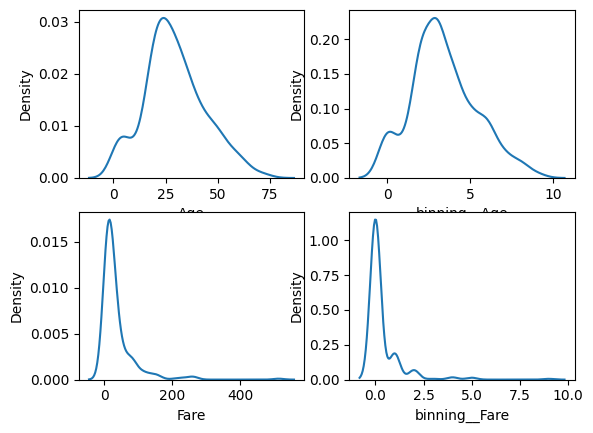

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


figure, ((first, second), (third, fourth)) = plt.subplots(ncols=2, nrows=2)
sns.kdeplot(X_train, x="Age", ax=first)
sns.kdeplot(X_train_trans, x="binning__Age", ax=second)
sns.kdeplot(X_train, x="Fare", ax=third)
sns.kdeplot(X_train_trans, x="binning__Fare", ax=fourth)

---


* **Equal frequency binning / Quantile binning**


Equal percentage(quntile) of the population is spread across all bins.
Say, if you want 10 bins, then each bin will contain 10 percentile of the data


In [22]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [
        (
            "binning",
            KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile"),
            ["Age", "Fare"],
        ),
    ],
    remainder="passthrough",
)

ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('binning',
                                 KBinsDiscretizer(encode='ordinal', n_bins=10),
                                 ['Age', 'Fare'])])

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

<Axes: xlabel='binning__Fare', ylabel='Density'>

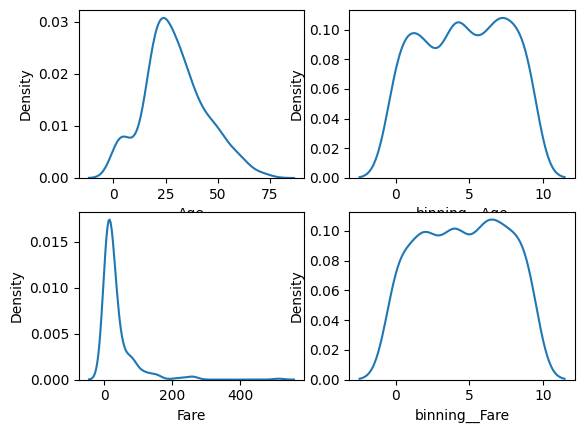

In [23]:
X_train_trans = ct.fit_transform(X_train)
X_test_trans = ct.fit_transform(X_test)

import seaborn as sns
import matplotlib.pyplot as plt

figure, ((first, second), (third, fourth)) = plt.subplots(ncols=2, nrows=2)
sns.kdeplot(X_train, x="Age", ax=first)
sns.kdeplot(X_train_trans, x="binning__Age", ax=second)
sns.kdeplot(X_train, x="Fare", ax=third)
sns.kdeplot(X_train_trans, x="binning__Fare", ax=fourth)

---


* **K-means binning**


In [24]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [
        (
            "binning",
            KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="kmeans"),
            ["Age", "Fare"],
        ),
    ],
    remainder="passthrough",
)

ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('binning',
                                 KBinsDiscretizer(encode='ordinal', n_bins=10,
                                                  strategy='kmeans'),
                                 ['Age', 'Fare'])])

d:\anaconda\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less

<Axes: xlabel='binning__Fare', ylabel='Density'>

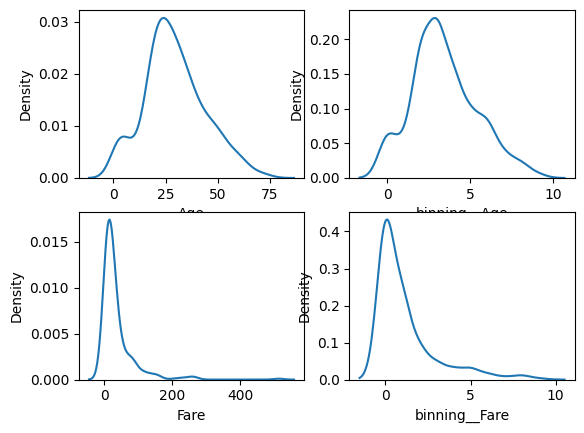

In [25]:
X_train_trans = ct.fit_transform(X_train)
X_test_trans = ct.fit_transform(X_test)

import seaborn as sns
import matplotlib.pyplot as plt

figure, ((first, second), (third, fourth)) = plt.subplots(ncols=2, nrows=2)
sns.kdeplot(X_train, x="Age", ax=first)
sns.kdeplot(X_train_trans, x="binning__Age", ax=second)
sns.kdeplot(X_train, x="Fare", ax=third)
sns.kdeplot(X_train_trans, x="binning__Fare", ax=fourth)

---


#### **2. Binarization**


Convert the data to either 0 or 1.


In [26]:
from sklearn.preprocessing import Binarizer
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [("binarizer", Binarizer(threshold=10), [])], remainder="passthrough"
)
ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('binarizer', Binarizer(threshold=10), [])])

---
